# **1. IMPORTING ALL THE NECESSARY LIBRARIES :**

1.   **pandas**       : For Reading Files rom the Drive. 
2.   **cv2**          : For Displaying and Manupulation Of Images. 
3.   **sklearn**      : For KMeans Clustering. 
4.   **matplotlib**   : For Plotting Images. 




In [ ]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import cv2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. COMPRESSION OF IMAGE :**


*   **Vector quantization (VQ) is a classical quantization technique from signal processing.**
*   **vector quantisation is a natural application of kmeans**

*   **It works by dividing a large set of points (vectors) into groups having approximately the same number of points closest to them. Each group is represented by its centroid point, as in k-means.**

*   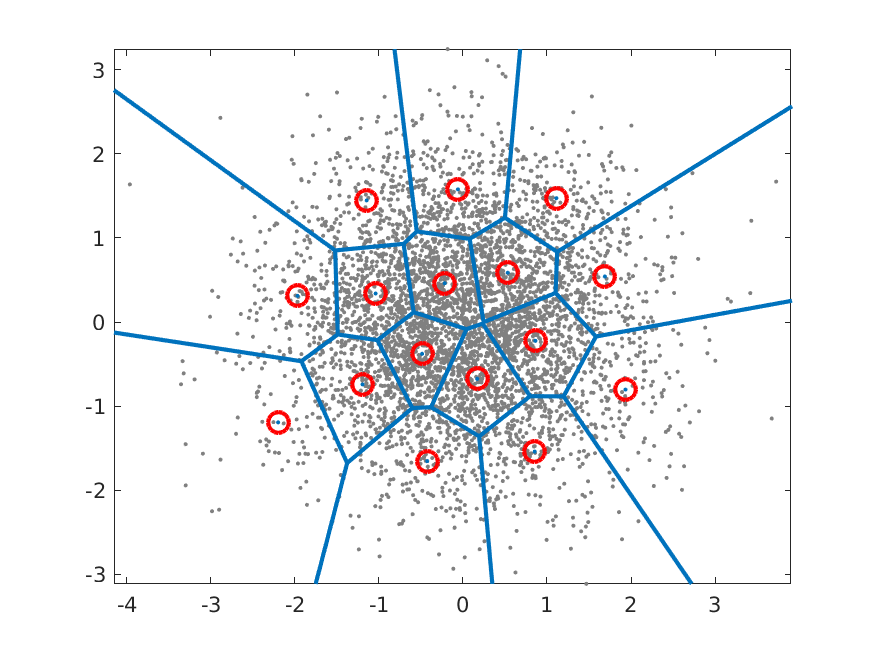

*   **APPLICATIONS : GAN , DATA COMPRESSION**

* **KMEANS ALGORITHM WHERE NUMBER OF CLUSTERS WILL BE DECIDED ON THE BASIS OF COMPRESSION RATIO GIVEN BY USER.**

In [ ]:
def compress_image(img,no_of_cluster):
  x=img.reshape((-1,1))
  kmeans=cluster.KMeans(n_clusters=no_of_cluster,n_init=6,random_state=5)
  kmeans.fit(x)
  centroids=kmeans.cluster_centers_.squeeze()
  labels=kmeans.labels_

  size=len(img)*len(img[0])*len(img[0][0])
  compressed=np.array(np.zeros((size,)),dtype=float)
  
  #assigning values to the nearest centroid
  for i in range(size):
    compressed[i]=centroids[labels[i]]
  
  input_image_compressed=compressed.reshape(img.shape)
  return input_image_compressed

* **THIS FUNTION WILL PLOT THE IMAGE USING MATPLOTLIB.PYPLOT**

In [ ]:
def plot_image(img,title):
  vmin=img.min()
  vmax=img.max()
  plt.figure(figsize=(15,10))
  plt.title(title)
  plt.imshow(img,cmap=plt.cm.gray,vmin=vmin,vmax=vmax,interpolation='nearest')


# **3. READING IMAGE FROM DRIVE AFTER MOUNTING USING GOOGLE.COLAB -> DRIVE.**

* **original image**

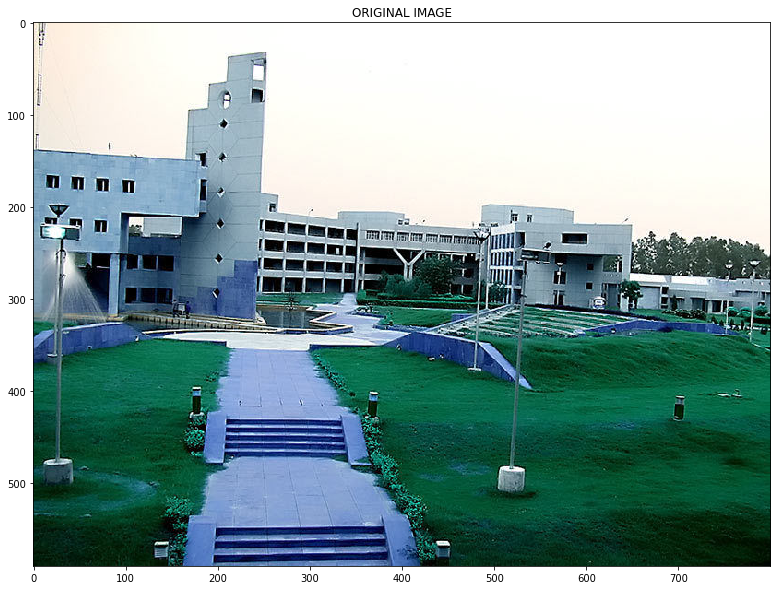

In [ ]:
#loading input image
img=cv2.imread('/content/drive/My Drive/dataset/dtu.jpeg')
# img=misc.
img.astype(np.uint8)
plot_image(img,'ORIGINAL IMAGE')

# **4. COMPRESSION RATIO AND CLUSTER FORMATION MODULE :**

In [ ]:
#manupulate compression rate from here : 
#bits will vary the results : 
bits = 5
compress_rate=round(100*(8.0-bits)/8.0,2)
print('size of image will be reduced by a factor of : ',8.0/bits)
print('compression rate : ',str(compress_rate))

#number of cluster will be followed by : 
clusters=np.power(2,bits)

size of image will be reduced by a factor of :  1.6
compression rate :  37.5


* **COMPRESSED IMAGE OF A College Building : CR = 37.5 %**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


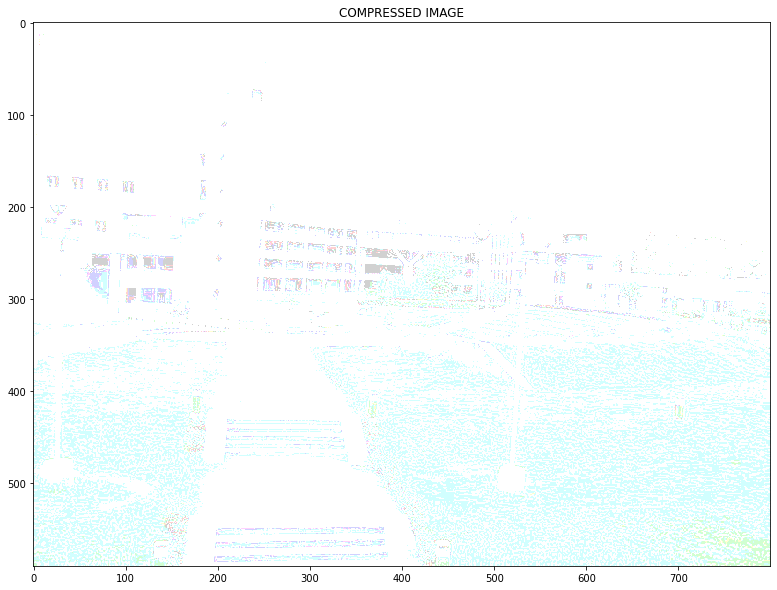

In [ ]:
input_image=compress_image(img,clusters)
plot_image(input_image,'COMPRESSED IMAGE')

* **COMPRESSED IMAGE OF the same College Building : CR = 12.5 %**

size of image will be reduced by a factor of :  1.1428571428571428
compression rate :  12.5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


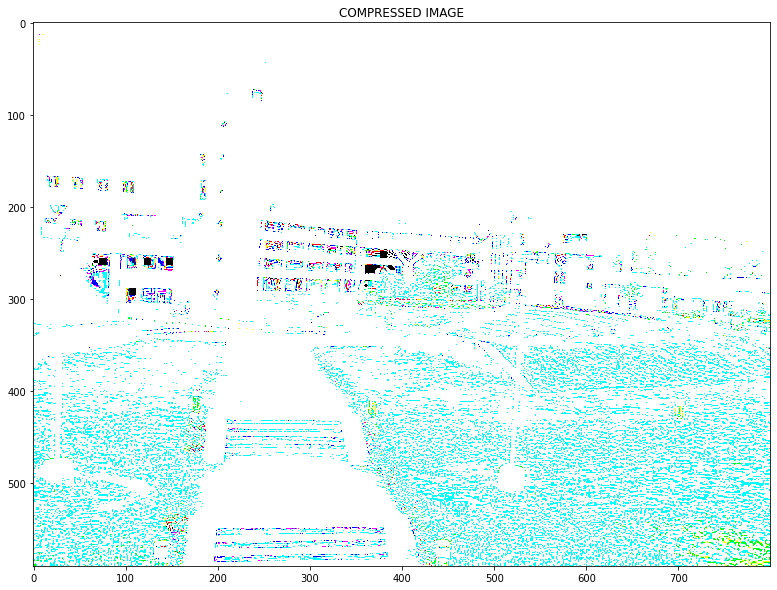

In [ ]:
#manupulate compression rate from here : 
#bits will vary the results : 
bits = 7
compress_rate=round(100*(8.0-bits)/8.0,2)
print('size of image will be reduced by a factor of : ',8.0/bits)
print('compression rate : ',str(compress_rate))

#number of cluster will be followed by : 
clusters=np.power(2,bits)

input_image1=compress_image(img,clusters)
plot_image(input_image1,'COMPRESSED IMAGE')


* **DISPLAYING ALL THREE IMAGES TOGETHER TO COMPARE DIFFERENCE.**

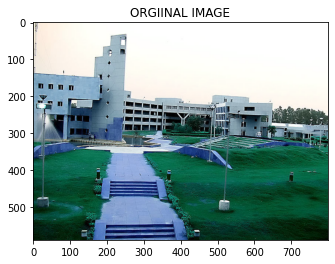

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


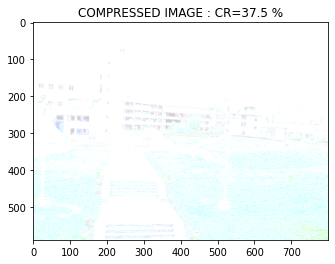

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


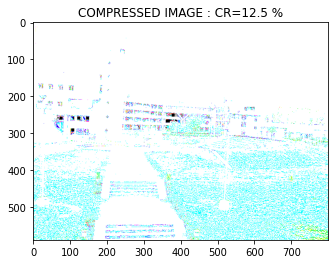

In [ ]:
# fig=plt.figure(figsize=(3, 1))
plt.imshow(img)
plt.title('ORGIINAL IMAGE')
plt.show()
plt.imshow(input_image)
plt.title('COMPRESSED IMAGE : CR=37.5 %')
plt.show()
plt.imshow(input_image1)
plt.title('COMPRESSED IMAGE : CR=12.5 %')
plt.show()

**Check Part 2.**